In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [18]:
df_dt = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv")

df_dt['healthy'] = (df_dt['calories'] < 120).astype(int)

X = df_dt[['calories', 'protein', 'fat']]
y = df_dt['healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Training 3 DTs

In [19]:
dt1 = DecisionTreeClassifier(random_state=1)
dt1.fit(X_train, y_train)

dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)
dt2.fit(X_train, y_train)

dt3 = DecisionTreeClassifier(criterion='gini', min_samples_split=20, random_state=3)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=3)

In [20]:
dt1_preds = dt1.predict(X_test)
dt2_preds = dt2.predict(X_test)
dt3_preds = dt3.predict(X_test)

In [21]:
acc1 = accuracy_score(y_test, dt1_preds)
acc2 = accuracy_score(y_test, dt2_preds)
acc3 = accuracy_score(y_test, dt3_preds)

cm1 = confusion_matrix(y_test, dt1_preds)
cm2 = confusion_matrix(y_test, dt2_preds)
cm3 = confusion_matrix(y_test, dt3_preds)

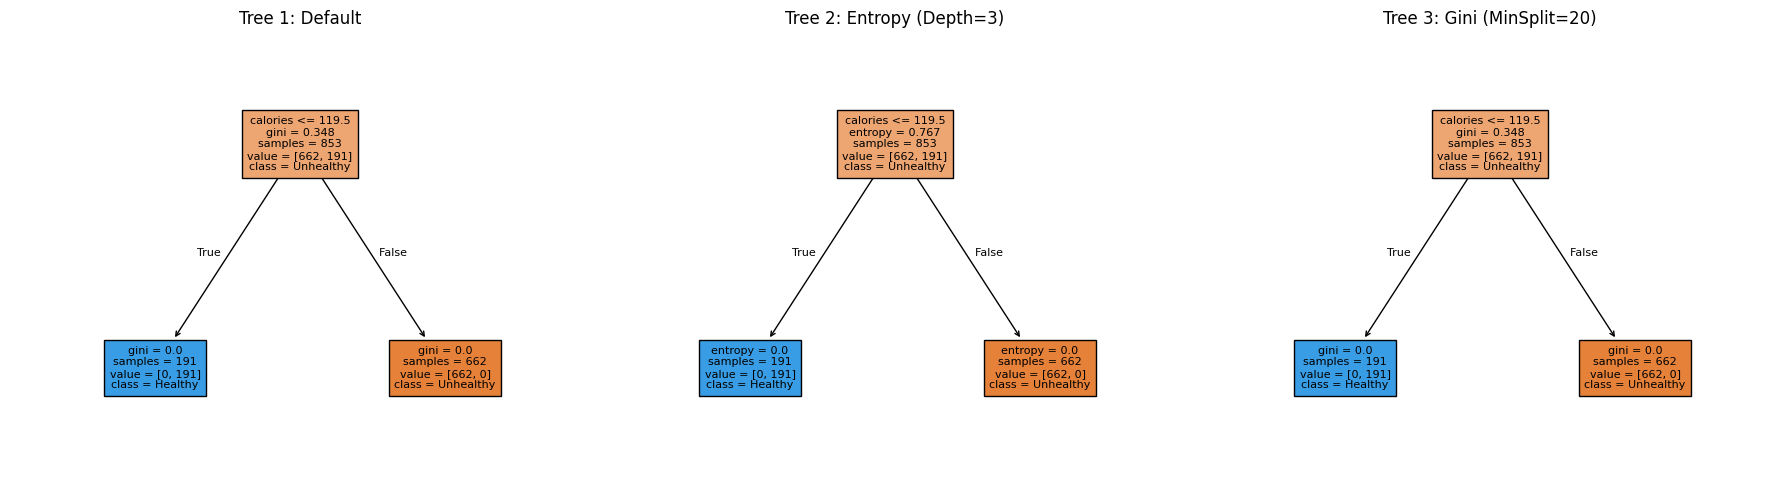

(1.0, 1.0, 1.0)

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Tree 1: Default', 'Tree 2: Entropy (Depth=3)', 'Tree 3: Gini (MinSplit=20)']
trees = [dt1, dt2, dt3]

for i, tree in enumerate(trees):
    plot_tree(tree, feature_names=X.columns, class_names=['Unhealthy', 'Healthy'],
              filled=True, ax=axs[i], fontsize=8)
    axs[i].set_title(titles[i])

plt.tight_layout()
plt.show()

(acc1, acc2, acc3)

Example Gini:

In [23]:
total = 100
healthy_total = 60
unhealthy_total = 40

p_healthy = healthy_total / total
p_unhealthy = unhealthy_total / total
entropy_before = - (p_healthy * math.log2(p_healthy) + p_unhealthy * math.log2(p_unhealthy))

left_healthy = 50
left_unhealthy = 10
right_healthy = 10
right_unhealthy = 30

left_total = left_healthy + left_unhealthy
p_lh = left_healthy / left_total
p_lu = left_unhealthy / left_total
entropy_left = - (p_lh * math.log2(p_lh) + p_lu * math.log2(p_lu))

right_total = right_healthy + right_unhealthy
p_rh = right_healthy / right_total
p_ru = right_unhealthy / right_total
entropy_right = - (p_rh * math.log2(p_rh) + p_ru * math.log2(p_ru))

weighted_entropy = (left_total / total) * entropy_left + (right_total / total) * entropy_right

info_gain = entropy_before - weighted_entropy

entropy_before, entropy_left, entropy_right, weighted_entropy, info_gain


(0.9709505944546686,
 0.6500224216483541,
 0.8112781244591328,
 0.7145247027726656,
 0.256425891682003)

$$
Entropy = -\left(\frac{60}{100} \log_2 \frac{60}{100} + \frac{40}{100} \log_2 \frac{40}{100}\right) \approx 0.97
$$


$$\text{Left group: } 50 \text{ healthy, } 10 \text{ unhealthy} \Rightarrow Entropy_{left} \approx 0.65

\text{Right group: } 10 \text{ healthy, } 30 \text{ unhealthy} \Rightarrow Entropy_{right} \approx 0.81
$$


$$
Weighted\ Entropy = \frac{60}{100} \cdot 0.65 + \frac{40}{100} \cdot 0.81 \approx 0.7145
$$


$$
Information\ Gain = 0.97 - 0.7145 = 0.2564
$$


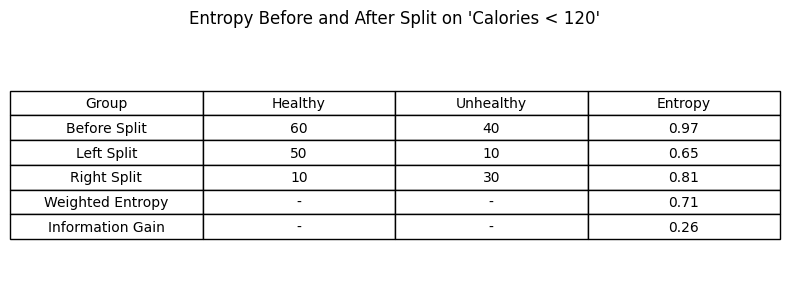

'|--- calories <= 119.50\n|   |--- class: 1\n|--- calories >  119.50\n|   |--- class: 0\n'

In [24]:
simple_tree = DecisionTreeClassifier(max_depth=1, criterion='entropy')
simple_tree.fit(X_train, y_train)

tree_rules = export_text(simple_tree, feature_names=list(X.columns))

p_healthy = 60 / 100
p_unhealthy = 40 / 100
entropy_before = - (p_healthy * math.log2(p_healthy) + p_unhealthy * math.log2(p_unhealthy))

left_entropy = - ((50/60) * math.log2(50/60) + (10/60) * math.log2(10/60))
right_entropy = - ((10/40) * math.log2(10/40) + (30/40) * math.log2(30/40))
weighted_entropy = (60/100) * left_entropy + (40/100) * right_entropy
info_gain = entropy_before - weighted_entropy

table_data = [
    ["Group", "Healthy", "Unhealthy", "Entropy"],
    ["Before Split", "60", "40", f"{entropy_before:.2f}"],
    ["Left Split", "50", "10", f"{left_entropy:.2f}"],
    ["Right Split", "10", "30", f"{right_entropy:.2f}"],
    ["Weighted Entropy", "-", "-", f"{weighted_entropy:.2f}"],
    ["Information Gain", "-", "-", f"{info_gain:.2f}"]
]

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
table = ax.table(cellText=table_data, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.title("Entropy Before and After Split on 'Calories < 120'", pad=20)
plt.tight_layout()
plt.show()

tree_rules

In [25]:
train_df = X_train.copy()
train_df['healthy'] = y_train

test_df = X_test.copy()
test_df['healthy'] = y_test

print("🟩 Training Set Sample:")
print(train_df.head(10))

print("\n🟦 Testing Set Sample:")
print(test_df.head(10))


🟩 Training Set Sample:
      calories  protein    fat  healthy
631      102.0    17.00   0.85        1
215      395.0    18.60  23.30        0
453      250.0     9.38   3.12        0
27        54.0     4.17   2.08        1
1175     327.0    14.63  13.92        0
802      232.0     3.35   4.86        0
390      260.0     8.00   2.00        0
1115     294.0    16.80   8.89        0
490      274.0    10.67   4.53        0
1100     355.0    19.56   7.50        0

🟦 Testing Set Sample:
      calories  protein    fat  healthy
542      107.0    16.10   2.68        1
259      390.0     8.26   1.83        0
43        43.0     0.57   1.20        1
1009     239.0    15.63   9.64        0
753      420.0     2.82  12.87        0
310       60.2     9.72   1.01        1
754      439.0     2.51  11.04        0
467      324.0     8.82  16.20        0
210      395.0    25.60  32.10        0
155      393.0    25.00  32.10        0


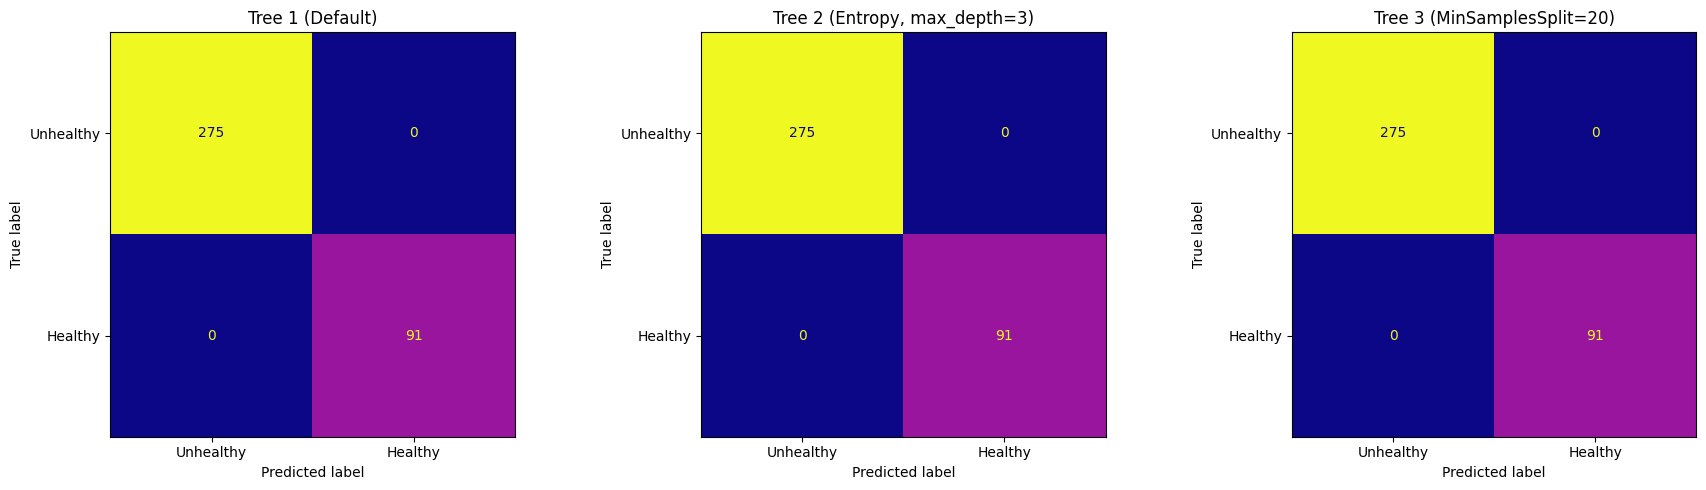

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Tree 1 (Default)', 'Tree 2 (Entropy, max_depth=3)', 'Tree 3 (MinSamplesSplit=20)']
cms = [cm1, cm2, cm3]

for ax, cm, title in zip(axes, cms, titles):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Unhealthy", "Healthy"])
    disp.plot(ax=ax, cmap='plasma', colorbar=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()

C:\Users\kavir\AppData\Local\Temp\ipykernel_12968\3503514123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tree_names, y=accuracies, palette='pastel')


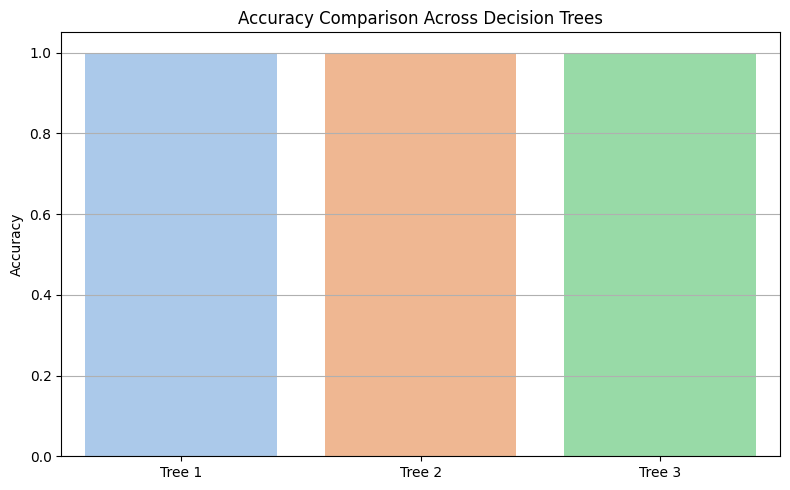

,Model,Accuracy
0,Tree 1,1.0
1,Tree 2,1.0
2,Tree 3,1.0


In [27]:
accuracies = [acc1, acc2, acc3]
tree_names = ['Tree 1', 'Tree 2', 'Tree 3']

plt.figure(figsize=(8, 5))
sns.barplot(x=tree_names, y=accuracies, palette='pastel')
plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Across Decision Trees")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

accuracy_df = pd.DataFrame({
    "Model": tree_names,
    "Accuracy": [round(acc1, 2), round(acc2, 2), round(acc3, 2)]
})

accuracy_df

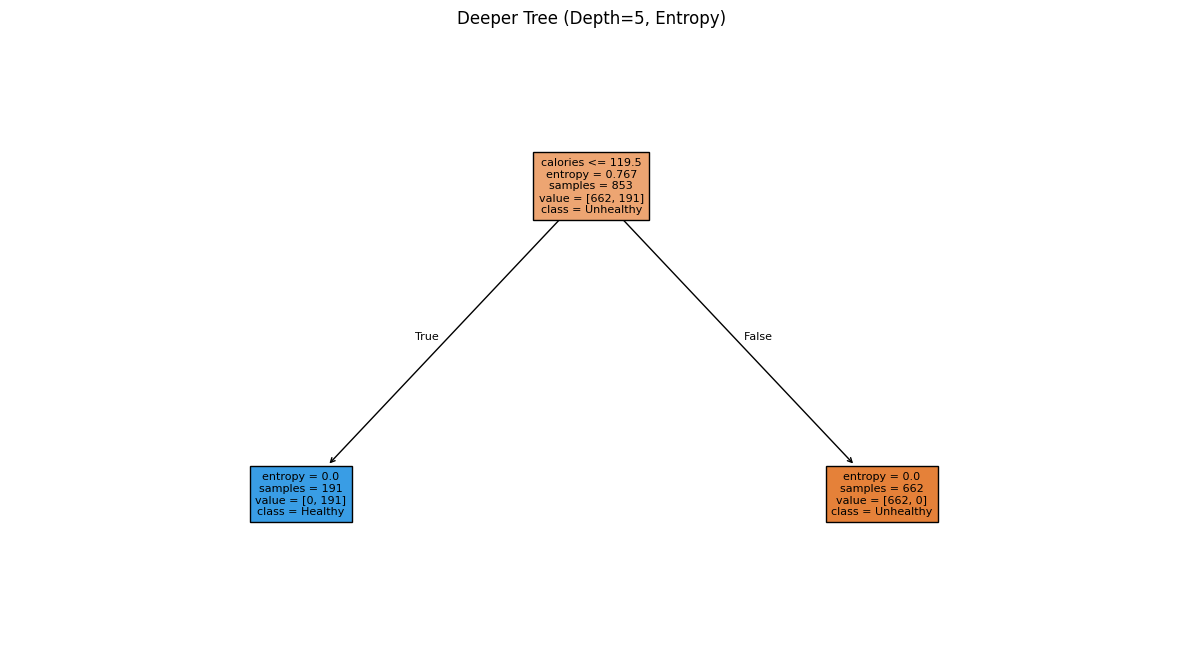

In [28]:
dt_deep = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, random_state=4)
dt_deep.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(dt_deep, feature_names=X.columns, class_names=['Unhealthy', 'Healthy'], filled=True, fontsize=8)
plt.title("Deeper Tree (Depth=5, Entropy)")
plt.show()